We will be coding the softmax regression algorithm from sratch also known as multinomial logisitic regression.It extends the usual logistic
regression to multiple classes

In [2]:
#importing the required modules such as numpy,pandas,sklearn and matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
"""loading the required dataset directly from sklearn therefore we don't need do any datapreprocessing, if the kaggle dataset was needed to be used 
just need to drop the id column, and since they are no missing values also we don't need to fill them using fillna or remove that row
we also don't need to do any feature scaling as all the features are already on a similar scale"""
from sklearn.datasets import load_iris
iris=load_iris()
#storing the features in X
X=iris.data
#storing the labels in y 
y=iris.target

In [4]:
#names of the features in iris dataset
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
#names of the classes/labels in iris dataset
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


The dataset we have presented is of the following format

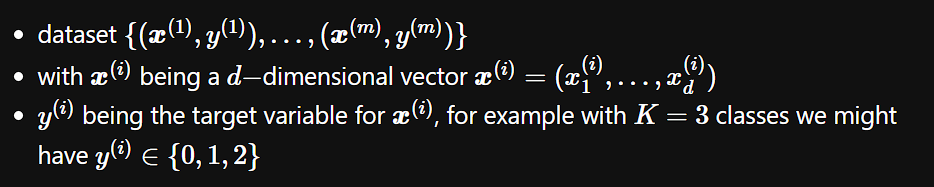

The features of a softmax regressin model are as follows

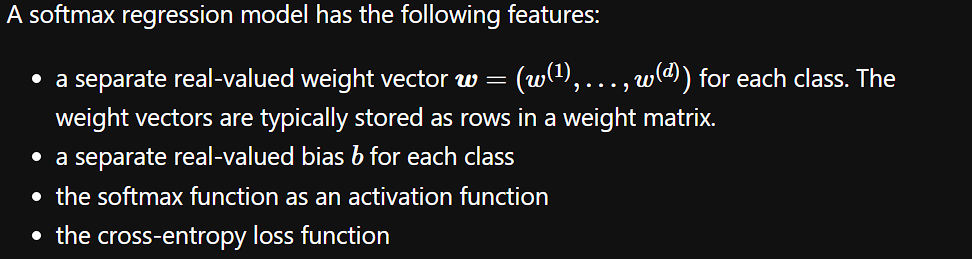

The training procedure for softmax regression is illustrated in the picture below

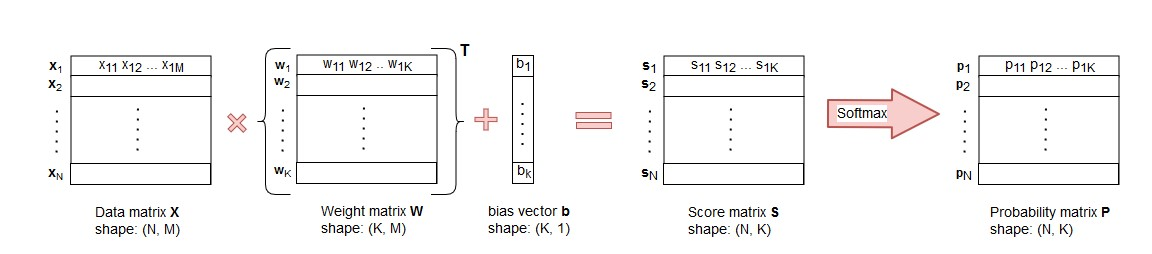

After intializing we perform the following steps
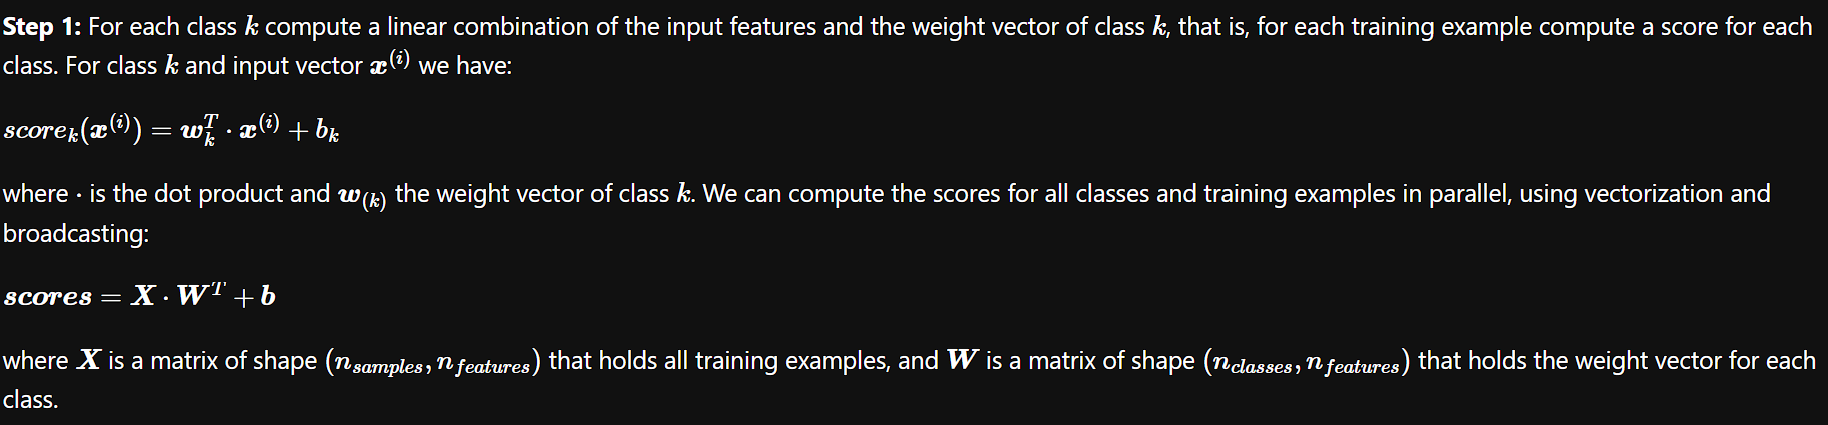
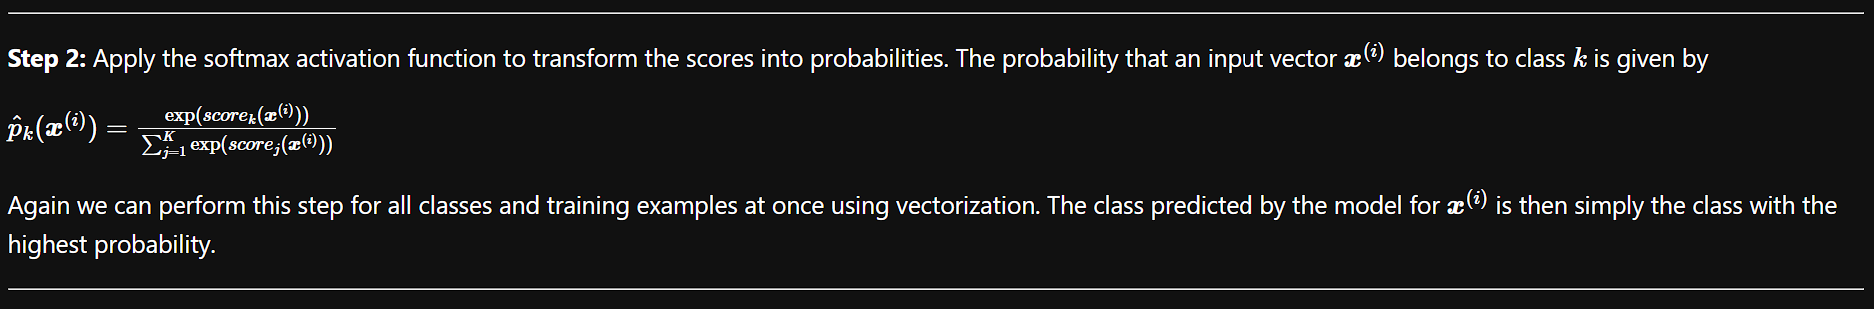
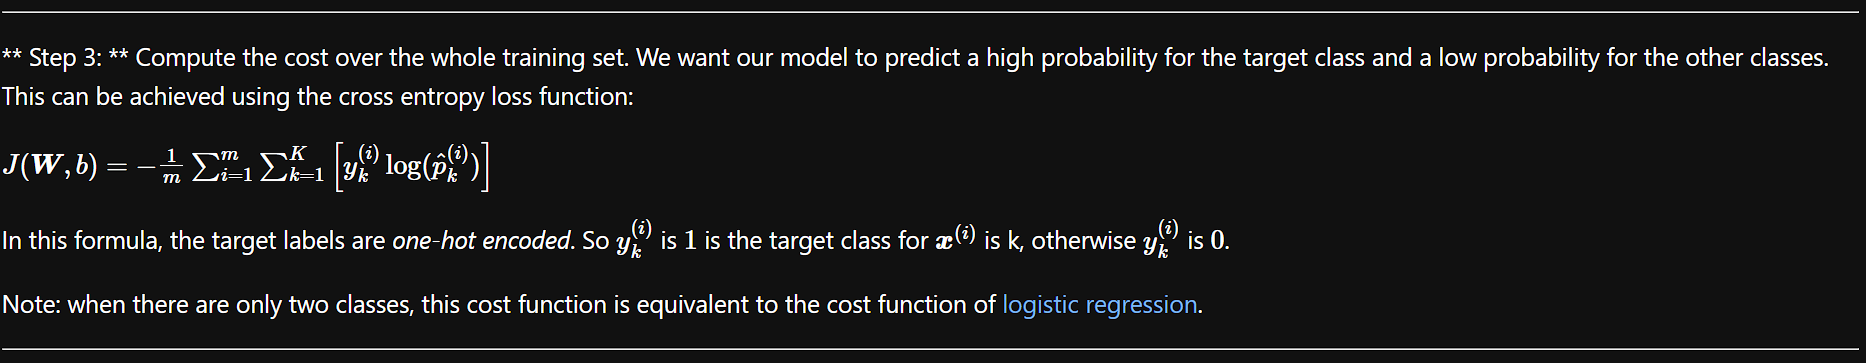
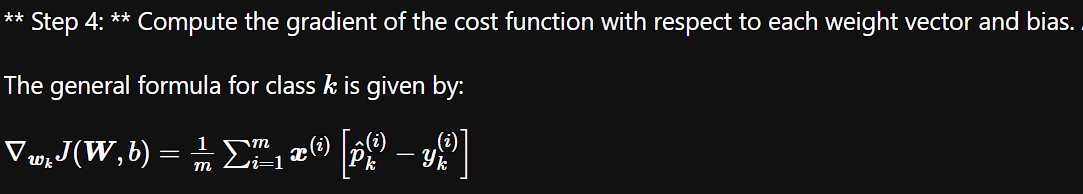
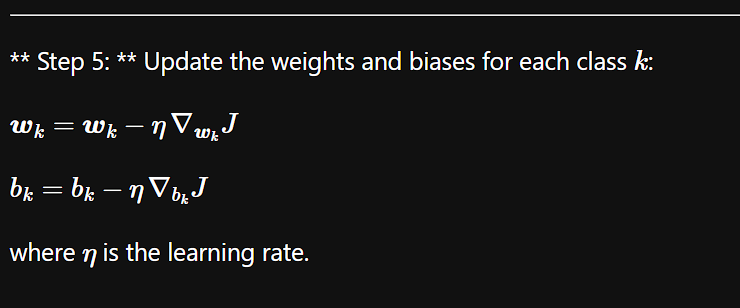

In [6]:
#defining the softmax function which will be needed for multiclass classification using the formula mentioned above
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

class MulticlassLogisticRegression():
    """intializing the learning rate, number of iterations and also
    the weights, bias, number of clases etc."""
    def __init__(self, lr=0.001, n_iters=5000):
        self.lr = lr
        self.n_iters = n_iters
        self.n_classes = None
        self.weights = None
        self.bias = None
        self.loss_history = [] #array used to store loss history
        
        
    #intializing the weight matrix and bias values with zero    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.n_classes = len(np.unique(y)) #using unique to find the number of classes
        self.weights = np.zeros((n_features, self.n_classes)) #intiailizing the weights and bias to zero as mentioned above
        self.bias = np.zeros(self.n_classes)
        
        for i in range(self.n_iters): #for every iteration we find the score/y using the formula mentioned above
            linear_pred = np.dot(X, self.weights) + self.bias #dot is used as dot product of X and weights
            predictions = softmax(linear_pred) #implementing the softmax function on the liner_pred
            
            #creating one-hot encoded labels to represent the target variable as a set of binary variables
            #i.e sample belonging to setosa class would be reprsented as [1,0,0]
            one_hot = np.zeros((n_samples, self.n_classes)) #creates a matrix of zeroes where rows are of n_samples and columns are of n_classes
            one_hot[np.arange(n_samples), y] = 1 #sets the element in each row of one_hot corresponding to the  true classs label for that sample to 1
            
            #we use the categorical crossentropy loss function as it is a multiclass classification model
            #categorical crossentropy is used as it measures the predicted probability distribution and the true probability distribution
            #we use the accuracy metric to measure the loss
            loss = -np.sum(one_hot * np.log(predictions)) / n_samples #calculating the categorical cross entropy and storing it
            self.loss_history.append(loss) #appending the loss to array so that we can plot it
            
            dw = (1/n_samples) * np.dot(X.T, (predictions - one_hot)) #finding dw and db using the above formula
            db = (1/n_samples) * np.sum(predictions - one_hot, axis=0)
            
            self.weights = self.weights - self.lr * dw #performing gradient descent for weights and bias 
            self.bias = self.bias - self.lr * db
            
            
    def predict(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias #predicts the linear_predictions using the learned weights of model and bias term
        y_prediction = softmax(linear_predictions) #applies softmax to convert the output to a probability distribution over the classes
        class_prediction = np.argmax(y_prediction, axis=1) #predicts the class by selecting the class with the highest probability in from the probability distribution
        return class_prediction
    
    def plot_loss(self): #function to plot the loss during training with respect to number of iterations
        plt.plot(self.loss_history)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss during training')
        plt.show()


In [7]:
#splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

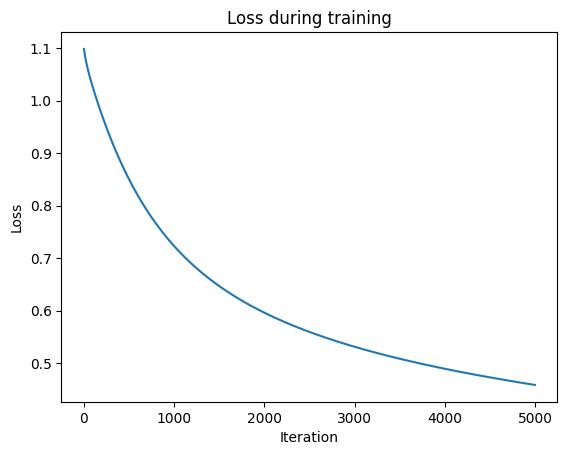

1.0


In [8]:
#intializing the class and calling the fit, predict and plot_loss function
clf = MulticlassLogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.plot_loss()

#this function calculates the accuracy by counting the no of correct predictions
#where the predicted label matches the true label and then divided by total number of labels
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

In [9]:
y_pred = clf.predict(np.array([5.1,3.5,1.4,0.2]).reshape(1, -1)) #reshaping it so that each row contains the features as the columns

In [10]:
print(y_pred)

[0]
